In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def entr(d):
    EPS = 1e-10
#     if not (0 <= d and d <= 1):
#         print(f"d={d} out of bounds")
    if abs(d) < EPS or abs(1-d) < EPS:
        return 0
    return -d*np.log2(d) - (1-d)*np.log2(1-d)
def entrV(d):
    return np.array([entr(di) for di in d])

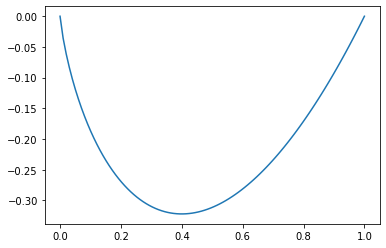

In [6]:
d = np.linspace(0,1,100)
plt.plot(d, (1-d/2) * entrV((1-d)/(1-d/2))-entrV(d))

<ipython-input-11-e1e6fbb62e73>:7: RuntimeWarning: invalid value encountered in log2
  return -d*np.log2(d) - (1-d)*np.log2(1-d)


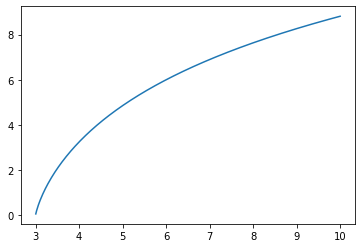

In [15]:
X = np.linspace(0,10, 500)[1:]
n=10
d=0.7
plt.plot(X, X*entrV((1-d)/(X/n)))

<ipython-input-11-e1e6fbb62e73>:7: RuntimeWarning: invalid value encountered in log2
  return -d*np.log2(d) - (1-d)*np.log2(1-d)


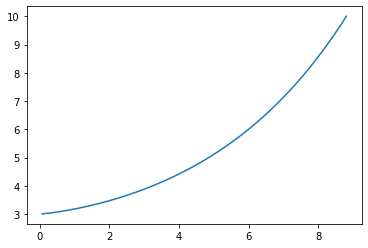

In [16]:
plt.plot(X*entrV((1-d)/(X/n)), X)

In [18]:
def count(a, b):
    m = len(a)
    n = len(b)
 
    # Create a table to store results of sub-problems
    lookup = [[0] * (n + 1) for i in range(m + 1)]
 
    # If first string is empty
    for i in range(n+1):
        lookup[0][i] = 0
 
    # If second string is empty
    for i in range(m + 1):
        lookup[i][0] = 1
 
    # Fill lookup[][] in bottom up manner
    for i in range(1, m + 1):
        for j in range(1, n + 1):
             
            # If last characters are same, 
            # we have two options -
            # 1. consider last characters of 
            # both strings in solution
            # 2. ignore last character of first string
            if a[i - 1] == b[j - 1]:
                lookup[i][j] = lookup[i - 1][j - 1] + lookup[i - 1][j]
                 
            else:
                # If last character are different, ignore
                # last character of first string
                lookup[i][j] = lookup[i - 1][j]
 
    return lookup[m][n]

In [155]:
def sample_ber_p(p, n):
    res = ""
    for i in range(n):
        res += "1" if np.random.random() < p else "0"
    return res

d=0.7
n = 500
iters = 100
samples_ran = []
samples_det = []
samples_ran_log = []
samples_det_log = []
samples_ran_xlogx = []
samples_det_xlogx = []

for i in range(iters):
    ran = count(sample_ber_p(0.5, n), sample_ber_p(0.5, int((1-d)*n)))
    det = count(sample_ber_p(0.5, n), sample_ber_p(0, int((1-d)*n)))
    normalized_ran_log = np.log2(float(ran)) / n
    normalized_det_log = np.log2(float(det)) / n
    normalized_ran_xlogx = float(ran) * np.log2(float(ran)) / n
    normalized_det_xlogx = float(det) * np.log2(float(det)) / n
    normalized_ran = (float(ran)) 
    normalized_det = (float(det))
    samples_ran.append(normalized_ran)
    samples_det.append(normalized_det)
    samples_ran_log.append(normalized_ran_log)
    samples_det_log.append(normalized_det_log)
    samples_ran_xlogx.append(normalized_ran_xlogx)
    samples_det_xlogx.append(normalized_det_xlogx)

In [156]:
np.log2(np.mean(samples_ran)) / n

0.571042804127656

In [157]:
np.log2(np.mean(samples_det)) / n

0.5247623060526997

In [158]:
np.mean(samples_ran_log)

0.56247920589663

In [159]:
np.mean(samples_det_log)

0.472665621790186

In [160]:
np.mean(samples_ran_xlogx) / np.mean(samples_ran) # The true thing

0.5763204407671566

In [161]:
np.mean(samples_det_xlogx) / np.mean(samples_det) # The all-zeros lower bound

0.5376299213306551

In [162]:
np.log2(np.mean(samples_ran)) / n # The Jensen lower bound

0.571042804127656